In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud # Import the wordcloud library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [140]:
import re
import nltk
from nltk.util import pr
# Download stopwords if not already downloaded
nltk.download('stopwords')  # This line ensures the stopwords dataset is downloaded
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
url = '/content/Dataset---Hate-Speech-Detection-using-Deep-Learning.csv'
df = pd.read_csv(url)

In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [143]:
df.isnull().sum()

,0
class,0
tweet,0


In [144]:
df['labels'] = df['class'].map({0:"Hate speech", 1:"Offensive language ", 2:"Neither"})
print(df.head())

   class                                              tweet  \
0      2  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                labels  
0              Neither  
1  Offensive language   
2  Offensive language   
3  Offensive language   
4  Offensive language   


In [145]:
data = df[['tweet','labels']]
df.head()

,class,tweet,labels
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language


In [ ]:
def clean(text):
  text= str(text).lower()
  text= re.sub('\{.*?\}','', text)
  text= re.sub('https?://\s+|www\.\s+', '', text)
  text= re.sub('<.*?>+','',text)
  text= re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text= re.sub('\n','',text)
  text= re.sub('\w*\d\w*','',text)
  text= [word for word in text.split('') if word not in stopword] # Assuming 'stopword' is defined elsewhere
  text= " ".join(text)
  text= [stemmer.stem(word)for word in text.split('')] # Assuming 'stemmer' is defined elsewhere
  text= " ".join(text)
  return text

  df["tweet"] = df["tweet"].apply(clean)
print(df.head())


   class                                              tweet  \
0      2  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                labels  
0              Neither  
1  Offensive language   
2  Offensive language   
3  Offensive language   
4  Offensive language   


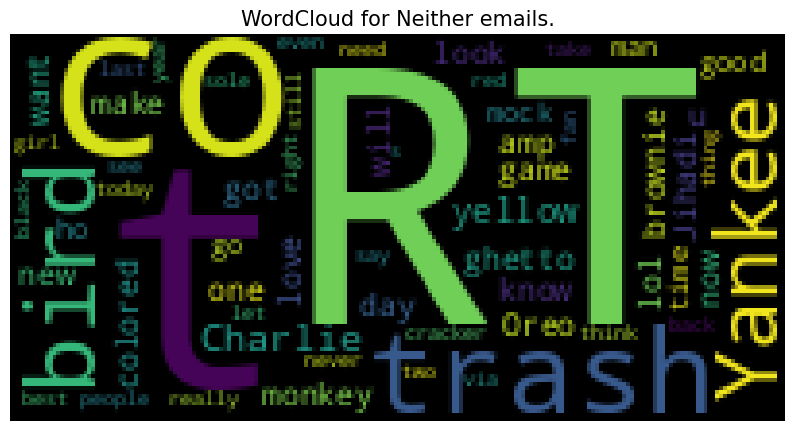

In [146]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], typ='Neither')

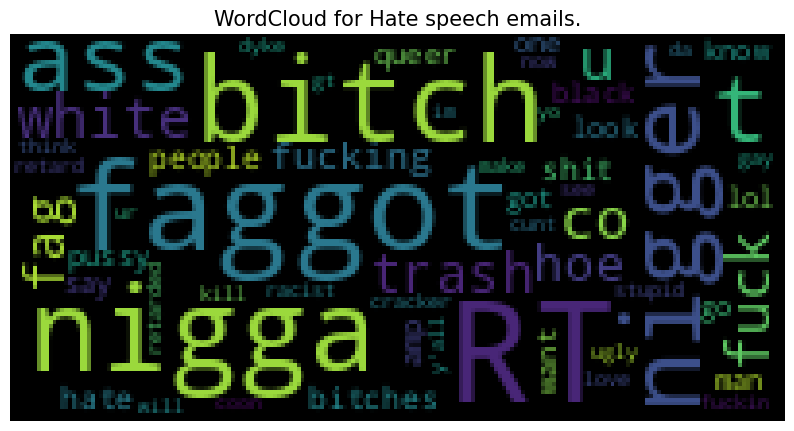

In [147]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==0], typ='Hate speech')

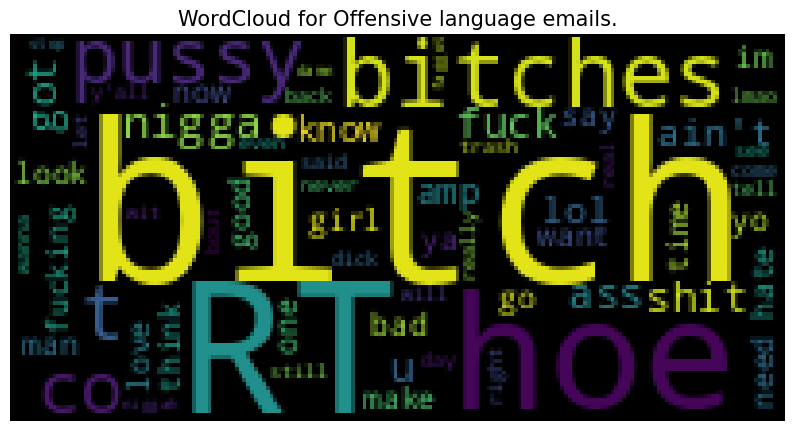

In [148]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==1], typ='Offensive language')

In [149]:
x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [150]:
test_data= "she is bullshit"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offensive language ']
